<a href="https://colab.research.google.com/github/jakecho1108/Project1/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sales_predictions.csv')
df.dropna(axis=1, inplace=True) 

In [2]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [3]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [31]:
ItemSales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
Items=np.array(ItemSales.index)
Sales=np.array(ItemSales.values)
ItemSales.describe()

count    1.600000e+01
mean     1.161945e+06
std      8.538392e+05
min      1.488682e+05
25%      4.311954e+05
50%      9.813829e+05
75%      1.598379e+06
max      2.820060e+06
Name: Item_Outlet_Sales, dtype: float64

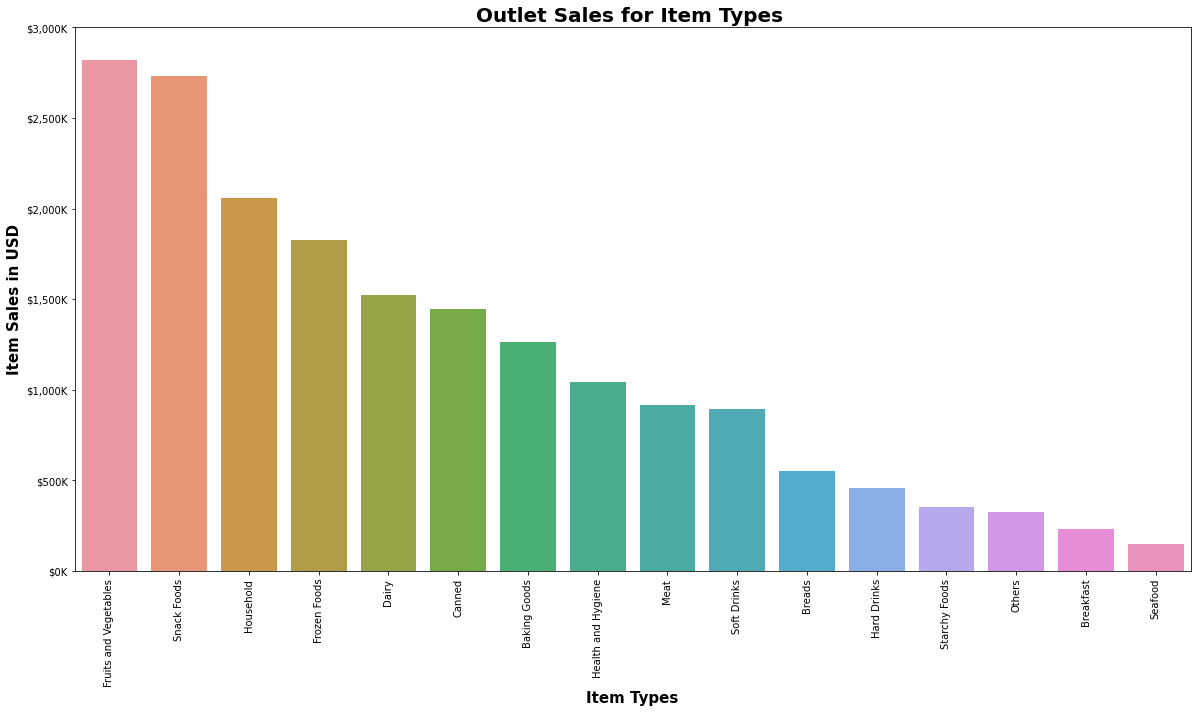

In [23]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x= Items, y = Sales)
plt.xticks(rotation = 90)
ax.set_title('Outlet Sales for Item Types ', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Types', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Sales in USD', fontsize = 15, fontweight = 'bold');
ax.set_ylim(bottom=0,top=3000000)

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

This graph shows which type of items are contributing to the sales among all the outlets.

In [30]:
OutletSales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
Outlets=np.array(OutletSales.index)
Sales2=np.array(OutletSales.values)
OutletSales.describe()

count    1.000000e+01
mean     1.859113e+06
std      9.833327e+05
min      1.796941e+05
25%      1.898048e+06
50%      2.130529e+06
75%      2.179844e+06
max      3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

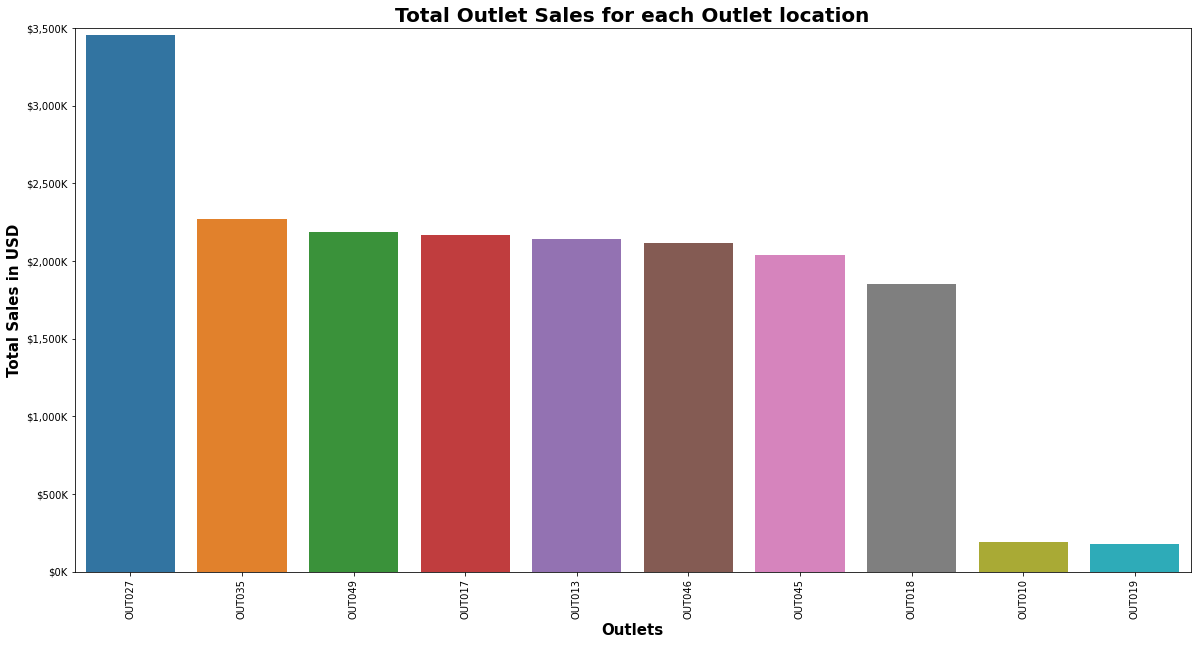

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x= Outlets, y = Sales2)
plt.xticks(rotation = 90)
ax.set_title('Total Outlet Sales for each Outlet location', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlets', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Total Sales in USD', fontsize = 15, fontweight = 'bold');
ax.set_ylim(bottom=0,top=3500000)

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

This graph shows which outlets have the most sales. This shows that OUT010 and OUT019 show very little sales compared to the most of them while OUT027 is outperforming by a lot. 